# The I-94 Traffic Dataset: Heavy Traffic Indicators

We're going to analzye a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94) between Minneapolis and Saint Paul. 

Our goal is to identify the key indicators of heavy traffic on this route.

In [235]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://s3.amazonaws.com/dq-content/524/i94_figma.png", width=1000, height=500)

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_theme()
import matplotlib.style as style

## Explore The I-94 Dataset

You can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [237]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [238]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [239]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


The dataset has 48,204 rows with each recording showing the traffic and weather during a specific time hour from 10/02/2012 to 09/30/2018. Except for Holiday column, all values are non-null. 

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyze Traffic Volume
We're going to analyze the traffic volume using the column `traffic_volume`.

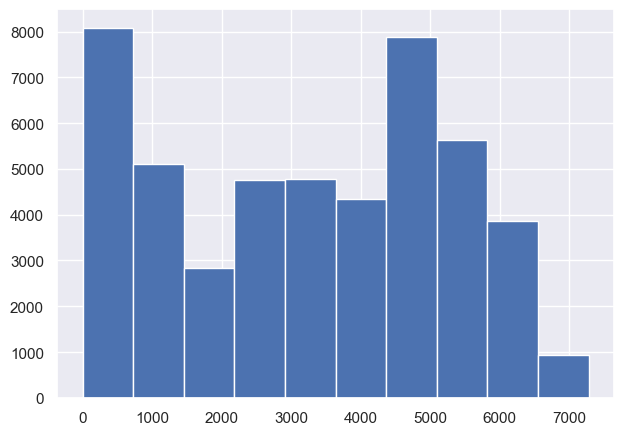

In [240]:
plt.hist(traffic['traffic_volume'])
plt.show()

In [241]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

### Traffic Volume: Day vs Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [242]:
# transform the date_time column to datetime datatype
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 19) ]  
print(day.shape)
night = traffic.copy()[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour > 19) ]    
print(night.shape) 

(25838, 9)
(22366, 9)


This significant difference in row numbers between `day` and `night` is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

Now that we've isolated `day` and `night`, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

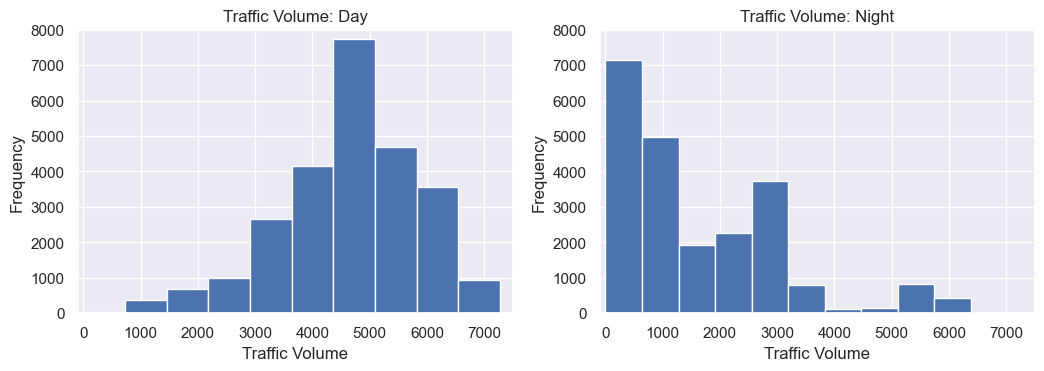

In [243]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [244]:
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [245]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,021 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,021).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,630.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

### Traffic Volume: Time

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

##### **Traffic Volume: Month**

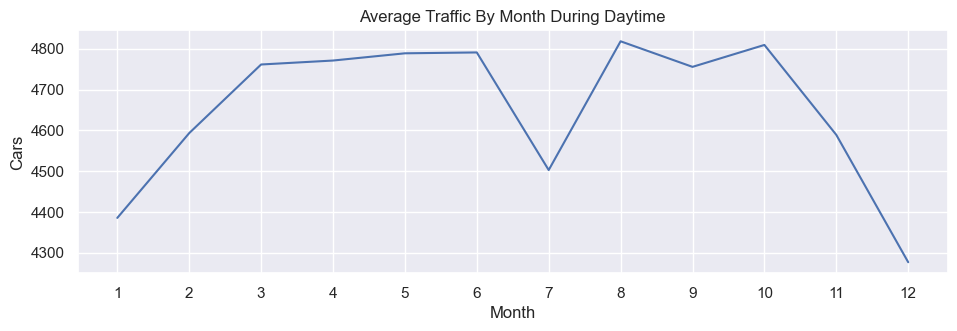

In [246]:
day['month'] = day['date_time'].dt.month 
by_month = day.groupby('month')['traffic_volume'].mean()
plt.figure(figsize=(10,3))
by_month.plot.line()
plt.title('Average Traffic By Month During Daytime')
plt.ylabel('Cars')
plt.xlabel('Month')
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

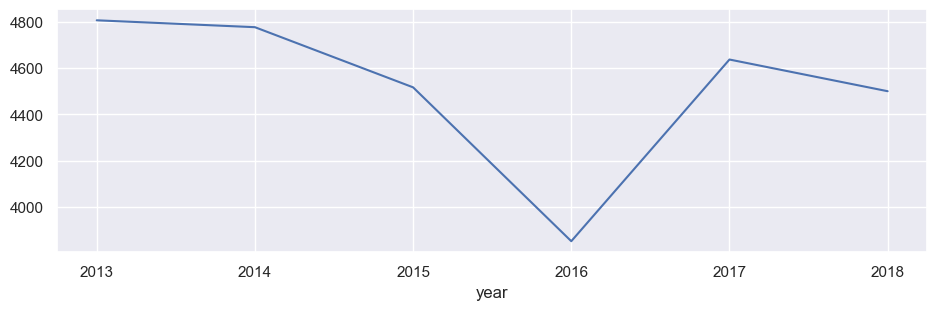

In [247]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
plt.figure(figsize=(10,3))
only_july.groupby('year')['traffic_volume'].mean().plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a sudden decrease in traffic volume. One possible reason for this is road construction — this [article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

#### **Traffic Volume: Day Of Week**

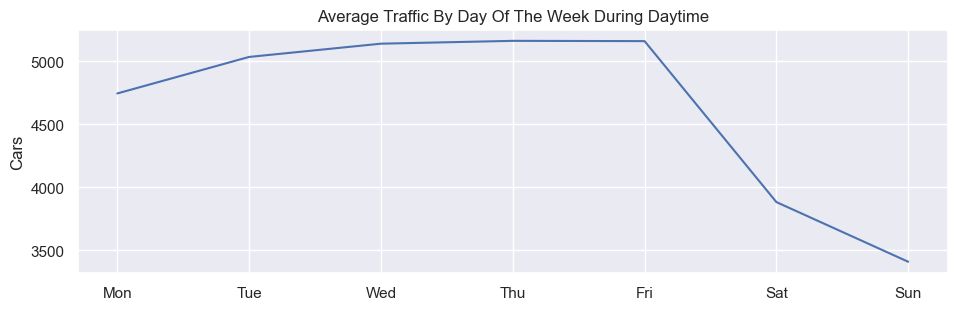

In [248]:
day['dayofweek'] = day['date_time'].dt.day_of_week
by_dayofweek = day.groupby('dayofweek').mean(numeric_only = True)
plt.figure(figsize=(10,3))
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Average Traffic By Day Of The Week During Daytime")
plt.ylabel("Cars")
plt.xlabel("")
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

#### **Traffic Volume: Time Of Day**
Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

In [249]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] 
weekend = day.copy()[day['dayofweek'] > 4]
by_hour_business = business_days.groupby('hour').mean(numeric_only = True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only = True)

In [250]:
print(by_hour_business['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64


In [251]:
print(by_hour_weekend['traffic_volume'])

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


Text(0, 0.5, 'Cars')

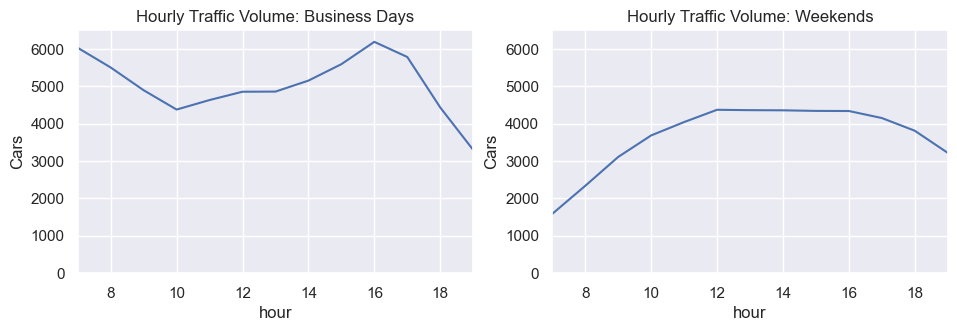

In [252]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(7,19)
plt.ylim(0,6500)
plt.title('Hourly Traffic Volume: Business Days')
plt.ylabel('Cars')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(7,19)
plt.ylim(0,6500)
plt.title('Hourly Traffic Volume: Weekends')
plt.ylabel('Cars')

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

#### **Time Indicator Analysis Findings**:
To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

### Traffic Volume: Weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [253]:
day.corr(numeric_only=True )['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
year             -0.000458
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.118. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

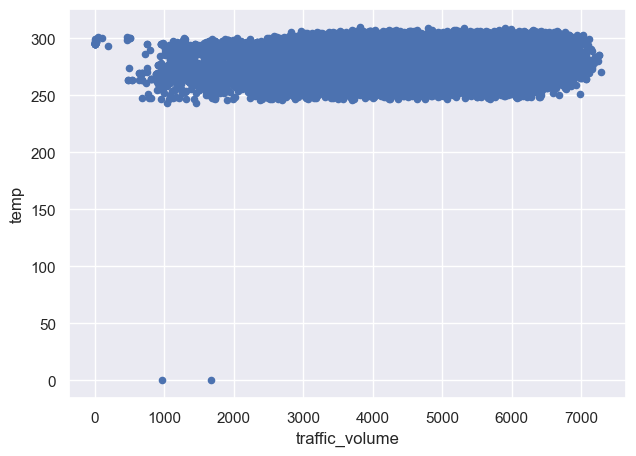

In [254]:
day.plot.scatter('traffic_volume','temp')
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

#### **Traffic Volume: Weather Types**

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

In [255]:
by_weather_main = day.groupby('weather_main').mean(numeric_only = True)
by_weather_desc = day.groupby('weather_description').mean(numeric_only=True)

In [256]:
print(by_weather_main['traffic_volume'])

weather_main
Clear           4661.666879
Clouds          4746.375927
Drizzle         4712.699060
Fog             4298.933511
Haze            4545.434932
Mist            4530.901782
Rain            4686.953503
Smoke           4447.307692
Snow            4295.594612
Squall          4211.000000
Thunderstorm    4512.479042
Name: traffic_volume, dtype: float64


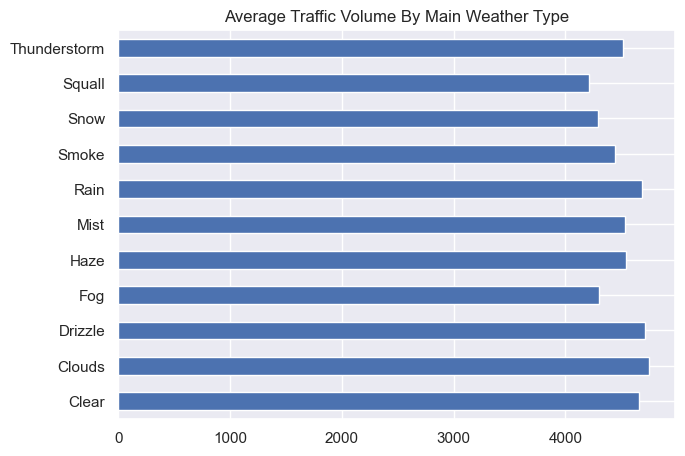

In [257]:
by_weather_main['traffic_volume'].plot.barh()
plt.title("Average Traffic Volume By Main Weather Type")
plt.ylabel("")
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

Text(0.5, 1.0, 'Average Traffic Volume By Weather Description')

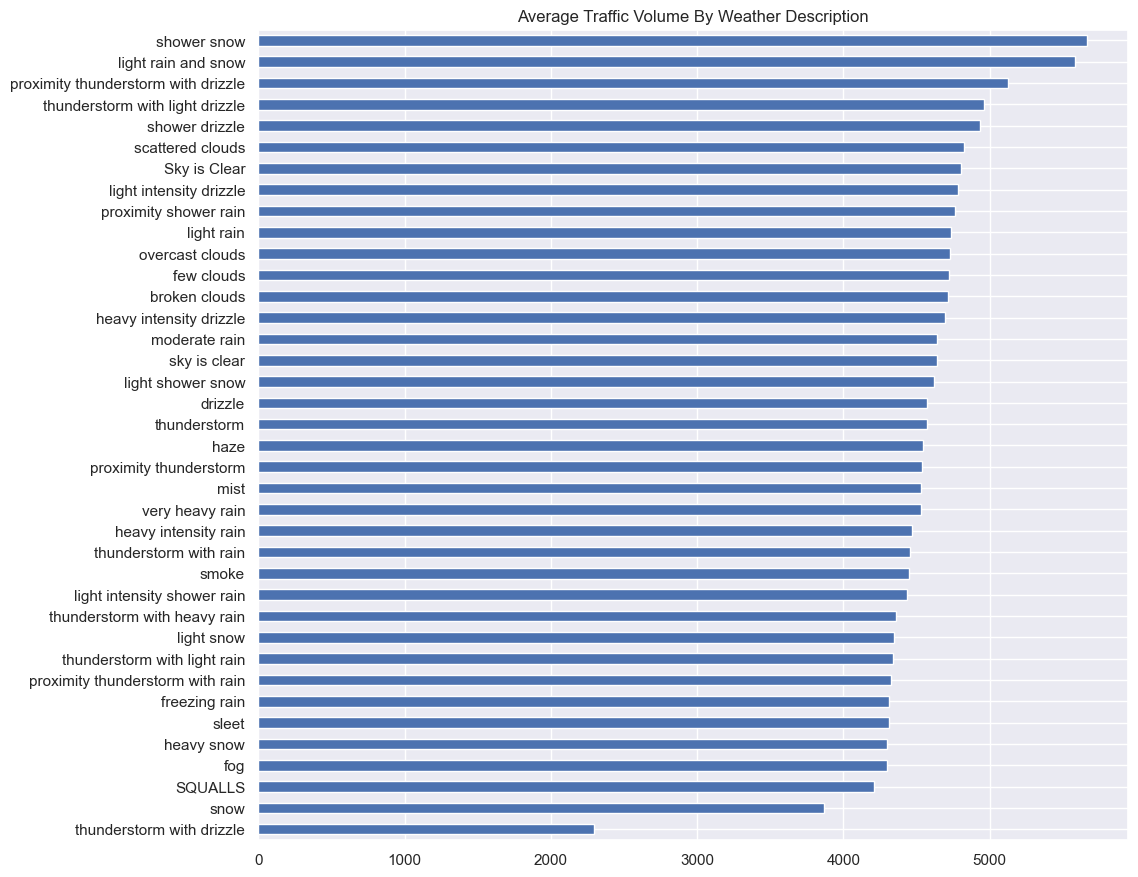

In [258]:
by_weather_desc['traffic_volume'].sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.ylabel("")
plt.title("Average Traffic Volume By Weather Description")


It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

**Weather indicators**
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle


### **Storytelling Data Visualization**

Text(6.5, 5030, 'Avg. daily day traffic in warm months at 4,750 cars/hr')

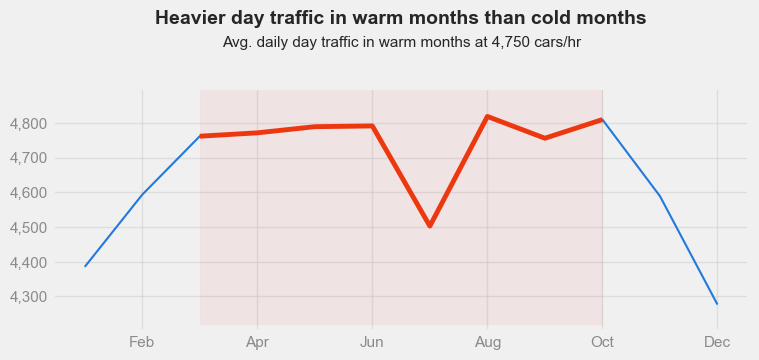

In [259]:
## convert groupby results to dataframe for data visualziation
by_month = by_month.reset_index()
## seperate warm months 
by_month_warm = by_month.copy()[(by_month['month']>=3) & (by_month['month']<=10)]

## Add the graph style
style.use('fivethirtyeight')

## Add the plots
fig, ax = plt.subplots(figsize=(8,3),dpi = 100)
ax.plot(by_month['month'],by_month['traffic_volume'],linewidth=1.5,color='#2179de')
ax.grid(alpha=0.5)

## Highlight the warm months from March to Oct

ax.plot(by_month_warm['month'],by_month_warm['traffic_volume'],linewidth=3.5,color='#ed370e')
ax.axvspan(xmin=3, xmax=10, ymin=0.03, alpha=0.05, color='red')

## Adjust the ticks
ax.set_xticks( [ 2,  4,  6,  8, 10, 12 ])
ax.set_xticklabels([ 'Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'],alpha = 0.5)
ax.set_yticks([4200., 4300., 4400., 4500., 4600., 4700., 4800., 4900.])
ax.set_yticklabels(['','4,300','4,400','4,500','4,600','4,700','4,800',''])
ax.set_yticks([4300., 4400., 4500., 4600., 4700., 4800., 4900.])
ax.set_yticklabels(['4,300','4,400','4,500','4,600','4,700','4,800',''],alpha = 0.5)

## Titles and legends
ax.text(6.5, 5100, "Heavier day traffic in warm months than cold months", weight='bold', size= 14,ha='center',va ='center')
ax.text(6.5, 5030, 'Avg. daily day traffic in warm months at 4,750 cars/hr', size=11,ha='center',va = 'center')


Text(3, 5600, 'Avg. daily day traffic during week days at 5,050 cars/hr')

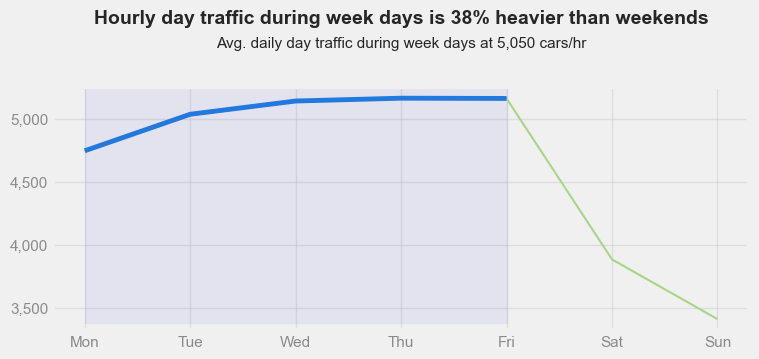

In [260]:
# seperate weekdays 
by_dayofweek = by_dayofweek.reset_index()
by_dayofweek_weekday = by_dayofweek.copy()[by_dayofweek['dayofweek'] <= 4]

# Add the graph style
style.use('fivethirtyeight')

# Set up the plot
fig, ax = plt.subplots(figsize = (8,3))
ax.grid(alpha = 0.5)
ax.plot(by_dayofweek['dayofweek'],by_dayofweek['traffic_volume'],color = '#A6D785', linewidth= 1.5 )
ax.plot(by_dayofweek_weekday['dayofweek'],by_dayofweek_weekday['traffic_volume'],color = '#2179de', linewidth= 3.5 )
ax.axvspan(xmin=0, xmax=4, ymin=0.03, alpha=0.05, color='blue')


# Setup the ticks
ax.set_xticks([  0.,  1.,  2.,  3.,  4.,  5.,  6.])
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],alpha = 0.5)

ax.set_yticks([ 3500., 4000., 4500., 5000.])
ax.set_yticklabels(['3,500','4,000','4,500','5,000'],alpha = 0.5)

## Title and legends
ax.text(3, 5800, "Hourly day traffic during week days is 38% heavier than weekends", weight='bold', size= 14,ha='center',va ='center')
ax.text(3, 5600, 'Avg. daily day traffic during week days at 5,050 cars/hr', size=11,ha='center',va = 'center')

Text(13, 7300, 'Day traffic peaked at rush hours of 7am and 16pm')

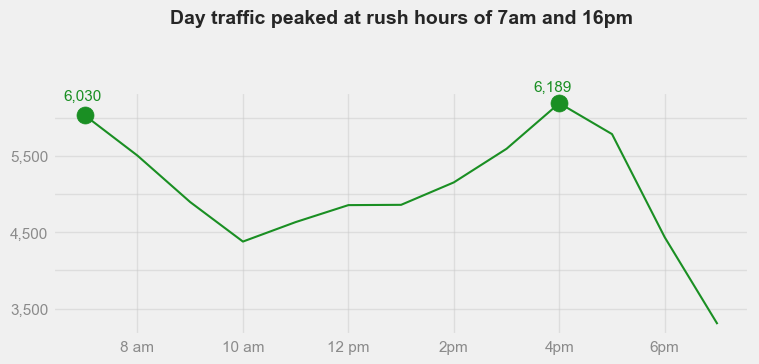

In [261]:
# seperate rush hours vs other hours
by_hour_business = by_hour_business.reset_index()
by_hour_business_rush = by_hour_business.copy()[(by_hour_business['hour']== 7) |(by_hour_business['hour']== 16)]
by_hour_business_other = by_hour_business.copy()[(by_hour_business['hour']!= 7) & (by_hour_business['hour'] != 16)]

# add the style
style.use("fivethirtyeight")

# set up the plot
fig, ax = plt.subplots(figsize = (8,3))
ax.grid(alpha = 0.5)
ax.plot(by_hour_business['hour'],by_hour_business['traffic_volume'],color = '#1a8f23', linewidth= 1.5)

# Set up the ticks
ax.set_xticks([  8., 10., 12., 14., 16., 18.])
ax.set_xticklabels(['8 am','10 am','12 pm','2pm', '4pm','6pm'], alpha = 0.5)
ax.set_yticks([3500., 4000., 4500., 5000., 5500., 6000.])
ax.set_yticklabels(['3,500', '', '4,500','','5,500',''],alpha = 0.5)

# Highlight the peak marker
plt.scatter(7, 6030.4, color='#1a8f23', marker='o', s=150, label='Rush Hour')
plt.scatter(16, 6189.4, color='#1a8f23', marker='o', s=150, label='Rush Hour')
plt.annotate(f'6,030',  xy=(7, 6030.4), xytext=(6.6, 6225.5), fontsize=11,   color='#1a8f23')
plt.annotate(f'6,189',  xy=(16, 6200), xytext=(15.5, 6350), fontsize=11,   color='#1a8f23')

# Title & subtitles
ax.text(13, 7300, "Day traffic peaked at rush hours of 7am and 16pm", weight='bold', size= 14,ha='center',va ='center')


In [263]:
# seperate the key conditions
by_weather_desc = by_weather_desc.reset_index()
by_weather_desc = by_weather_desc.sort_values(by='traffic_volume', ascending=True)
by_weather_desc['weather_description'] = by_weather_desc['weather_description'].astype(str).str.lower()
shower_snow = by_weather_desc.copy()[by_weather_desc['weather_description'] == 'shower snow']
lightrain_snow = by_weather_desc.copy()[by_weather_desc['weather_description'] == 'light rain and snow']
thunderstorm_dizzle = by_weather_desc.copy()[by_weather_desc['weather_description'] == 'thunderstorm with drizzle']

In [293]:
thunderstorm_dizzle = by_weather_desc.copy()[by_weather_desc['weather_description'] == 'thunderstorm with drizzle']

Text(2000, 40.5, 'Weather conditions mostly impact traffic: Shower snow, Light rain adn snow, and Thunderstorm with dizzle')

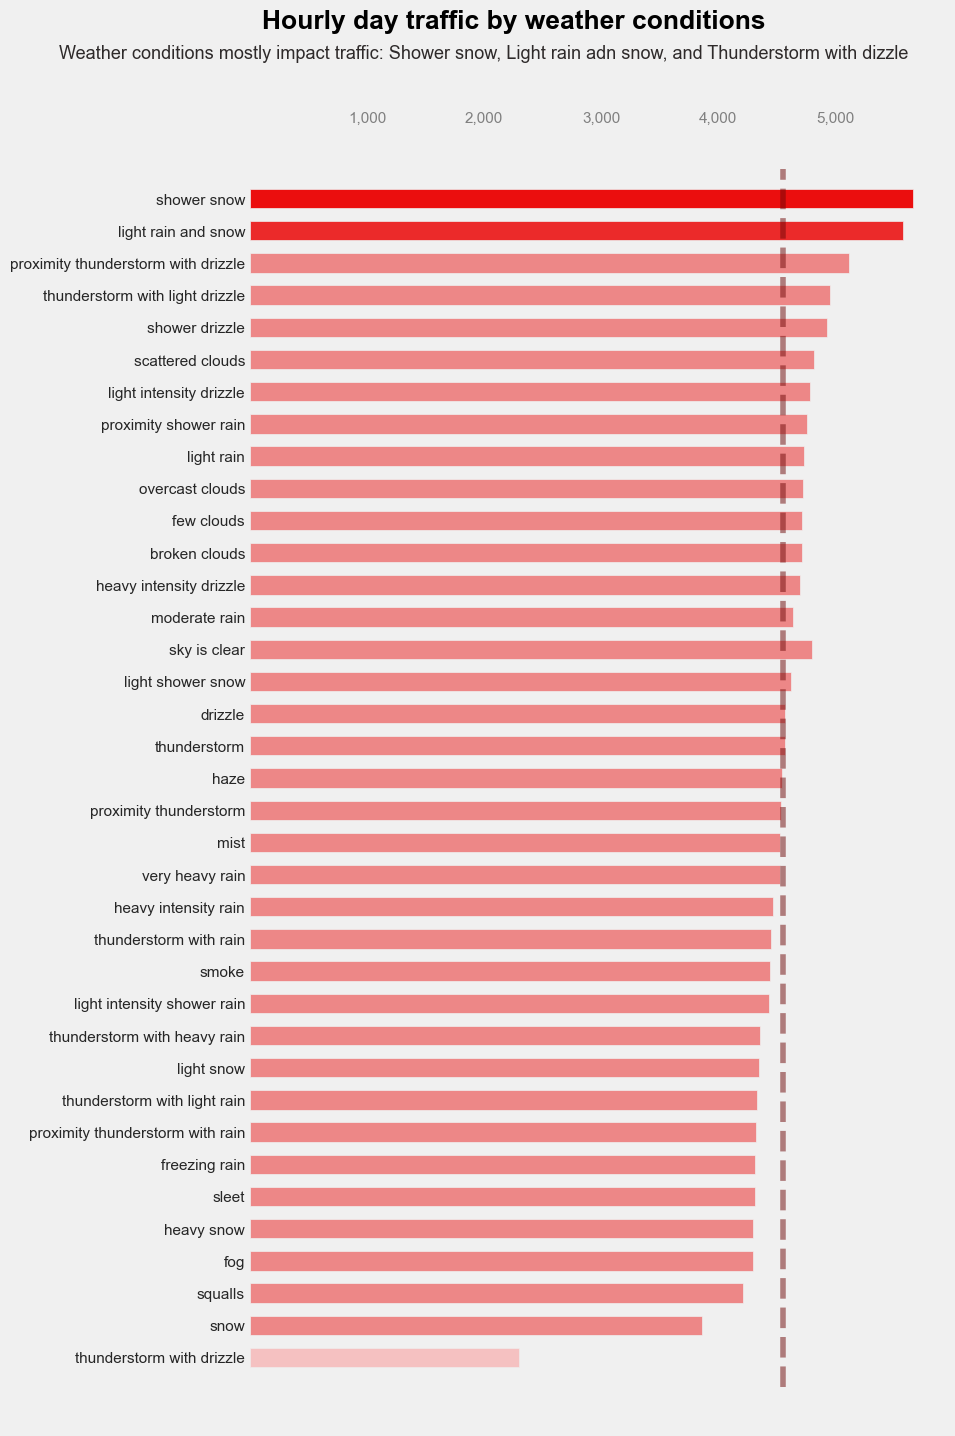

In [383]:
# set up the plot
fig, ax = plt.subplots(figsize=(8, 16))
ax.grid()
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

# charting
ax.barh(by_weather_desc['weather_description'],by_weather_desc['traffic_volume'],height=0.6, align='center',color = '#ed8787')
ax.barh(shower_snow['weather_description'],shower_snow['traffic_volume'],height=0.6, align='center', color = '#eb0e0e')
ax.barh(lightrain_snow['weather_description'],lightrain_snow['traffic_volume'],height=0.6, align='center', color = '#eb2a2a')
ax.barh(thunderstorm_dizzle['weather_description'],thunderstorm_dizzle['traffic_volume'],height=0.6, align='center', color = '#f5c1c1')

## adjust the ticks
ax.get_xticks()
ax.set_xticks([  1000., 2000., 3000., 4000., 5000.])
ax.set_xticklabels(['1,000','2,000','3,000','4,000','5,000'],alpha = 1)
ax.xaxis.tick_top()

# add the average line
ax.axvline(4551.9, ymin = 0.03, ymax = 0.97, c='#6e0808', alpha = 0.5, linestyle='--')

# title and subtitle
ax.text(2250, 41.5, "Hourly day traffic by weather conditions", weight='bold', size= 19,ha='center',va ='center', color = 'black')
ax.text(2000, 40.5, "Weather conditions mostly impact traffic: Shower snow, Light rain adn snow, and Thunderstorm with dizzle", size= 13,ha='center',va ='center', color = '#2e2a2a')
